In [9]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv("pubchem_ec_3.1.1.7_bioactivity_protein.csv")

In [11]:
df.sample(10)

,baid,aid,sid,cid,geneid,pmid,aidtype,aidmdate,hasdrc,rnai,...,repacxn,taxid,cellids,targettaxid,anatomyid,anatomy,dois,pmcids,pclids,citations
31389,341095279,1058685,194166261,72724703.0,43.0,24220172.0,Confirmatory,20220830,0,0,...,P22303,9606,NaN,NaN,NaN,NaN,10.1016/j.bmcl.2013.10.034,NaN,14763682.0,"Mao F, Chen J, Zhou Q, Luo Z, Huang L, Li X. N..."
5358,198382084,537384,123095012,52946774.0,113580815.0,20943395.0,Confirmatory,20220830,0,0,...,O42275,8005,NaN,NaN,NaN,NaN,10.1016/j.bmc.2010.09.044,NaN,18760801.0,"Awang K, Chan G, Litaudon M, Ismail NH, Martin..."
5044,155702614,479261,103754272,46888790.0,113580815.0,20347302.0,Literature-derived,20180913,0,0,...,O42275,8005,NaN,NaN,NaN,NaN,10.1016/j.bmcl.2010.02.102,PMC2864113,5881803.0,"Young S, Fabio K, Guillon C, Mohanta P, Halton..."
6745,254901055,625193,103255183,4891.0,43.0,NaN,Confirmatory,20240503,0,0,...,P22303,9606,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24265,101505403,361789,103644427,25030068.0,83817.0,18662884.0,Confirmatory,20220830,0,0,...,P37136,10116,NaN,NaN,NaN,NaN,10.1016/j.bmc.2008.07.014,NaN,7235617.0,"Shen Y, Sheng R, Zhang J, He Q, Yang B, Hu Y. ..."
11546,372117417,1678836,461539144,162660332.0,43.0,33479638.0,Confirmatory,20220830,0,0,...,P22303,9606,NaN,NaN,NaN,NaN,10.1039/d0md00009d,PMC7429979,27782667.0,"de Souza MM, Andreolla MC, Ribeiro TC, Gonçalv..."
10255,363296452,1480846,103172304,1935.0,43.0,28242549.0,Literature-derived,20200622,0,0,...,P22303,9606,NaN,NaN,NaN,NaN,10.1016/j.ejmech.2017.02.042,NaN,32399537.0,"Xia CL, Wang N, Guo QL, Liu ZQ, Wu JQ, Huang S..."
8176,334150653,732751,164143416,14846973.0,43.0,23395652.0,Confirmatory,20230629,0,0,...,P22303,9606,NaN,NaN,NaN,NaN,10.1016/j.bmcl.2012.11.083,NaN,17452454.0,"Gunosewoyo H, Tipparaju SK, Pieroni M, Wang Y,..."
30566,105951779,447653,103702014,45484577.0,113580815.0,19640713.0,Literature-derived,20180911,0,0,...,O42275,8005,NaN,NaN,NaN,NaN,10.1016/j.bmcl.2009.07.035,PMC2728166,10641753.0,"Bharate SB, Guo L, Reeves TE, Cerasoli DM, Tho..."
27019,355757014,1329700,374324782,132495293.0,43.0,27780618.0,Confirmatory,20230629,0,0,...,P22303,9606,NaN,NaN,NaN,NaN,10.1016/j.bmc.2016.10.016,NaN,31718883.0,"Mughal EU, Sadiq A, Murtaza S, Rafique H, Zafa..."


In [12]:
df.shape

(38248, 31)

In [13]:
df.isna().sum()

 baid              0
aid                0
sid                0
cid              101
geneid          1879
pmid            3459
aidtype            0
aidmdate           0
hasdrc             0
rnai               0
activity           0
protacxn           0
acname         11532
acqualifier    16168
acvalue        14480
aidsrcname         0
aidname            0
cmpdname         101
targetname         0
targeturl          0
ecs                0
repacxn            0
taxid              0
cellids        36258
targettaxid    38248
anatomyid      37271
anatomy        37271
dois            3459
pmcids         34621
pclids          3459
citations       3459
dtype: int64

In [14]:
df.dtypes

 baid            int64
aid              int64
sid              int64
cid            float64
geneid         float64
pmid           float64
aidtype         object
aidmdate         int64
hasdrc           int64
rnai             int64
activity        object
protacxn        object
acname          object
acqualifier     object
acvalue        float64
aidsrcname      object
aidname         object
cmpdname        object
targetname      object
targeturl       object
ecs             object
repacxn         object
taxid            int64
cellids        float64
targettaxid    float64
anatomyid      float64
anatomy         object
dois            object
pmcids          object
pclids         float64
citations       object
dtype: object

In [15]:
df['activity']

0        Unspecified
1        Unspecified
2        Unspecified
3             Active
4             Active
            ...     
38243         Active
38244         Active
38245         Active
38246         Active
38247         Active
Name: activity, Length: 38248, dtype: object

In [18]:
df['baid'] = df[' baid']

In [16]:
df['activity'].unique()

array(['Unspecified', 'Active', 'Inactive', 'Inconclusive'], dtype=object)

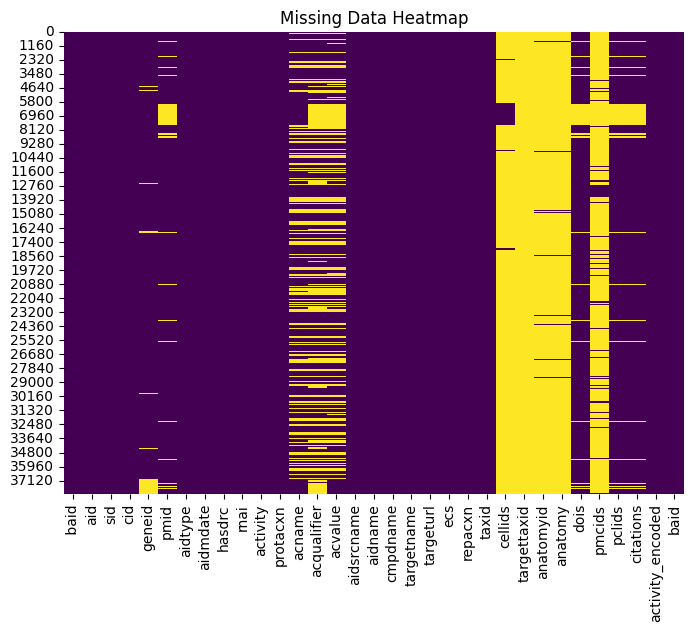

In [21]:
# 2. Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [23]:
df_dropped_columns = df.dropna(axis=1)
print("\nDataFrame after dropping columns with NaN values:")
df_dropped_columns


DataFrame after dropping columns with NaN values:


,baid,aid,sid,aidtype,aidmdate,hasdrc,rnai,activity,protacxn,aidsrcname,aidname,targetname,targeturl,ecs,repacxn,taxid,activity_encoded,baid
0,99404722,32093,103178416,Confirmatory,20220830,0,0,Unspecified,P37136,ChEMBL,Inhibitory activity against rat brain total Ac...,Ache - acetylcholinesterase (Norway rat),/gene/83817,3.1.1.7,P37136,10116,3,99404722
1,363340253,1498904,404672155,Literature-derived,20200623,0,0,Unspecified,P22303,ChEMBL,"Potency index, ratio of 7-MEOTA IC50 to compou...",ACHE - acetylcholinesterase (Yt blood group) (...,/gene/43,3.1.1.7,P22303,9606,3,363340253
2,99281393,31468,103395251,Confirmatory,20181017,0,0,Unspecified,P22303,ChEMBL,In vitro inhibitory concentration against puri...,ACHE - acetylcholinesterase (Yt blood group) (...,/gene/43,3.1.1.7,P22303,9606,3,99281393
3,99394437,31339,103395531,Confirmatory,20220830,0,0,Active,P22303,ChEMBL,In vitro inhibitory concentration against puri...,ACHE - acetylcholinesterase (Yt blood group) (...,/gene/43,3.1.1.7,P22303,9606,0,99394437
4,101725886,302143,103540442,Confirmatory,20220830,0,0,Active,O42275,ChEMBL,Inhibition of Electrophorus electricus AChE by...,ache - acetylcholinesterase (Yt blood group) (...,/gene/113580815,3.1.1.7,O42275,8005,0,101725886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38243,411309795,1803295,341094243,Confirmatory,20231017,0,0,Active,O42275,BindingDB,AChE and BuChE Activity Assay from Article 10....,Acetylcholinesterase (electric eel),/protein/O42275,3.1.1.7,O42275,8005,0,411309795
38244,411309796,1803295,341094244,Confirmatory,20231017,0,0,Active,O42275,BindingDB,AChE and BuChE Activity Assay from Article 10....,Acetylcholinesterase (electric eel),/protein/O42275,3.1.1.7,O42275,8005,0,411309796
38245,411310195,1803295,341094238,Confirmatory,20231017,0,0,Active,O42275,BindingDB,AChE and BuChE Activity Assay from Article 10....,Acetylcholinesterase (electric eel),/protein/O42275,3.1.1.7,O42275,8005,0,411310195
38246,411310196,1803295,341094241,Confirmatory,20231017,0,0,Active,O42275,BindingDB,AChE and BuChE Activity Assay from Article 10....,Acetylcholinesterase (electric eel),/protein/O42275,3.1.1.7,O42275,8005,0,411310196


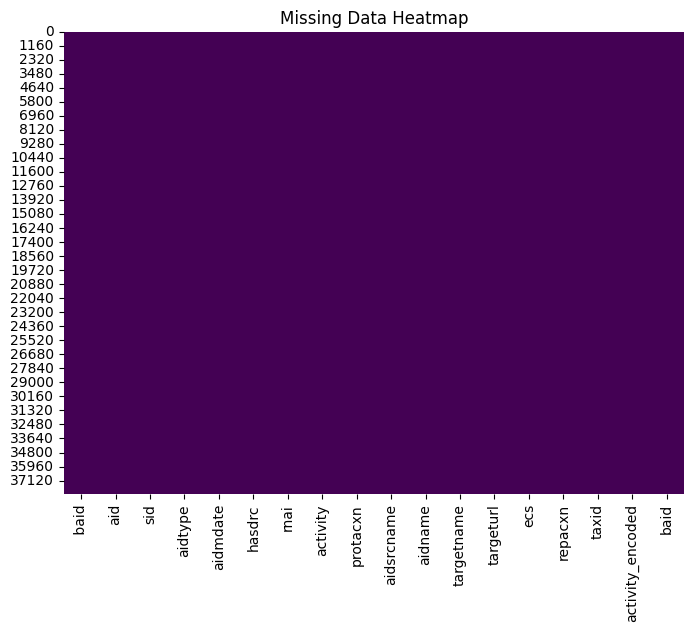

In [24]:
# 2. Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_dropped_columns.isna(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [26]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the `activity` column into numerical values
label_encoder = LabelEncoder()
df_dropped_columns['activity_encoded'] = label_encoder.fit_transform(df_dropped_columns['activity'])

# Select all columns except `activity` and `activity_encoded` for ANOVA
X = df_dropped_columns.drop(columns=['activity', 'activity_encoded'])
X = X.select_dtypes(include=['number'])  # Use only numerical columns
y = df_dropped_columns['activity_encoded']

# Perform ANOVA feature selection
f_stat, p_values = f_classif(X, y)

# Create a DataFrame to display the results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Statistic': f_stat,
    'P-Value': p_values
})

# Format the values to be more readable
anova_results['F-Statistic'] = anova_results['F-Statistic'].round(2)
anova_results['P-Value'] = anova_results['P-Value'].apply(lambda x: f"{x:.2e}")

# Sort results by P-Value
anova_results = anova_results.sort_values(by='P-Value')

print(anova_results)


    Feature  F-Statistic    P-Value
3  aidmdate       927.21   0.00e+00
6     taxid        27.24   1.37e-17
1       aid       205.68  2.37e-132
2       sid        26.64   3.31e-17
0      baid       116.10   7.64e-75
7      baid       116.10   7.64e-75
4    hasdrc          NaN        nan
5      rnai          NaN        nan


C:\Users\Lukme\AppData\Local\Temp\ipykernel_26780\479783894.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_columns['activity_encoded'] = label_encoder.fit_transform(df_dropped_columns['activity'])
c:\Users\Lukme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Lukme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [31]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode all categorical columns into numerical values
df_encoded = df_dropped_columns.copy()
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Encode the `activity` column as the target variable
df_encoded['activity_encoded'] = LabelEncoder().fit_transform(df_encoded['activity'])

# Use all columns except `activity` and `activity_encoded` as features
X = df_encoded.drop(columns=['activity', 'activity_encoded'])
y = df_encoded['activity_encoded']

# Perform ANOVA feature selection
f_stat, p_values = f_classif(X, y)

# Create a DataFrame to display the results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Statistic': f_stat,
    'P-Value': p_values
})

# Format the values for better readability
anova_results['F-Statistic'] = anova_results['F-Statistic']
anova_results['P-Value'] = anova_results['P-Value'].round(5)  # Set P-Value to 4 decimal places

# Sort results by P-Value
anova_results = anova_results.sort_values(by='P-Value')

print(anova_results)


       Feature  F-Statistic  P-Value
0         baid   116.098865      0.0
1          aid   205.680035      0.0
2          sid    26.642626      0.0
3      aidtype  3744.405852      0.0
4     aidmdate   927.212715      0.0
7     protacxn    22.681645      0.0
8   aidsrcname  1948.813626      0.0
9      aidname   154.325397      0.0
10  targetname    58.745139      0.0
11   targeturl   138.559767      0.0
13     repacxn    21.281622      0.0
14       taxid    27.238039      0.0
15        baid   116.098865      0.0
5       hasdrc          NaN      NaN
6         rnai          NaN      NaN
12         ecs          NaN      NaN


c:\Users\Lukme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 5  6 12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Lukme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
